# HR Analytics Employee Attrition and Performance
Predicting the attrition of your valuable employees

## Exploratory Data Analysis (EDA)

In [118]:
#As the dataset is stored on google drive, the following code connects to the google drive and mounts it.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [119]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

In [120]:
#Reading the dataset into a dataframe
main_df=pd.read_csv("/content/drive/MyDrive/MSc. (CA)/Academics/Second Year/Semester 3/Machine Learning Algorithms/Case Study/Employees.csv")

#Displaying the first 10 rows of the dataset
main_df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [121]:
#Descriptive Analytics on Numerical Columns in the dataframe
main_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


As Observed, There are no missing values in all the columns.

In [122]:
#Displaying the number of records and attributes in the dataframe
main_df.shape

(1470, 35)

In [123]:
#Displaying additional information about the dataframe about the attributes, non-null values and datatype
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [124]:
#Checking for any null values or records in the dataset
main_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [125]:
#Checking Unique values by Attributes
main_df.apply(lambda x : len(x.unique()))

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [126]:
#Check for Categorical Attributes
cat_column=[]
for x in main_df.dtypes.index:
    if(main_df.dtypes[x]=='object'):
        cat_column.append(x)
cat_column

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [127]:
for x in cat_column:
    print(main_df[x].value_counts(),"\n")

No     1233
Yes     237
Name: Attrition, dtype: int64 

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64 

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64 

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64 

Male      882
Female    588
Name: Gender, dtype: int64 

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64 

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64 

Y    1470
Name: Over18, dtype: int64 

No     1054
Yes   

As observed, 'Over18' has only one value, i.e. 'Y', which is constant throughout and will have no impact hence it can be removed from the dataset.

In [128]:
main_df=main_df.drop(columns=['Over18'])

As 'EmployeeNumber' is also a discrete attribute, it can be dropped from the dataframe as it will not contribute in improving the accuracy of the model

In [129]:
main_df=main_df.drop(columns=['EmployeeNumber'])

Since this is a Binary Classification Problem, whether the employee will leave the company or not, The distribution among the two classes is visualised below

## Data Visualization

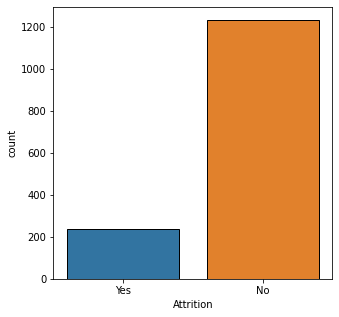

In [130]:
#Bar Chart Representation for Attrition
fig= plt.figure(figsize =(5,5))
sns.countplot(x ='Attrition', data = main_df, edgecolor = "black")

In [131]:
'''
Checking the value counts of JobSatisfaction above 1 and representing it in the form of a pie chart
Low : 1
Medium : 2
High : 3
Very High : 4
Anyone with a JobSatisfaction entry above 1 (Above Low) is treated as satisfied
'''
job_satisfaction=(main_df['JobSatisfaction']>1).value_counts().reset_index()
job_satisfaction.replace(to_replace= True, value = 'Satisfied', inplace=True )
job_satisfaction.replace(to_replace= False, value = 'Not Satisfied', inplace=True )
job_satisfaction

,index,JobSatisfaction
0,Satisfied,1181
1,Not Satisfied,289


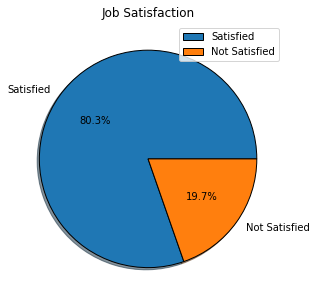

In [132]:
#Pie Chart Representation for employee job satisfaction
fig= plt.figure(figsize =(5,5))
plt.pie(job_satisfaction['JobSatisfaction'], labels=job_satisfaction['index'],autopct='%1.1f%%',shadow=True, 
        wedgeprops = {"edgecolor" : "black",'linewidth': 1,'antialiased': True})
plt.title("Job Satisfaction")
plt.legend()
plt.show()

As observed, about 80% of the employees are satisfied with their employment and remaining 20% seem to be dissatisfied. 

In [133]:
attr_yes=main_df.loc[(main_df['Age'])&(main_df['Attrition']=='Yes'),('Age','Attrition')].reset_index()
attr_yes=attr_yes.drop(columns=['index','Attrition'])

In [134]:
attr_no=main_df.loc[(main_df['Age'])&(main_df['Attrition']=='No'),('Age','Attrition')].reset_index()
attr_no=attr_no.drop(columns=['index','Attrition'])

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


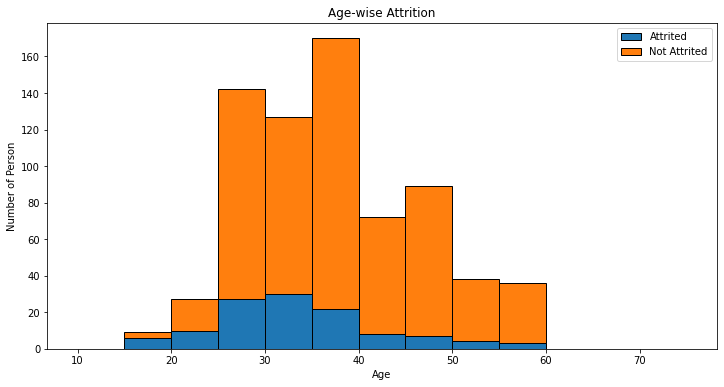

In [135]:
plt.figure(figsize=(12, 6))
plt.title('Age-wise Attrition')
plt.xlabel('Age')
plt.ylabel('Number of Person')
plt.hist([attr_yes.Age,attr_no.Age], bins=np.arange(10,80,5),stacked=True, edgecolor = "black");
plt.legend(['Attrited', 'Not Attrited']);

As observed from the graph above, Age group of 25-40 has the Highest Attrition Rate

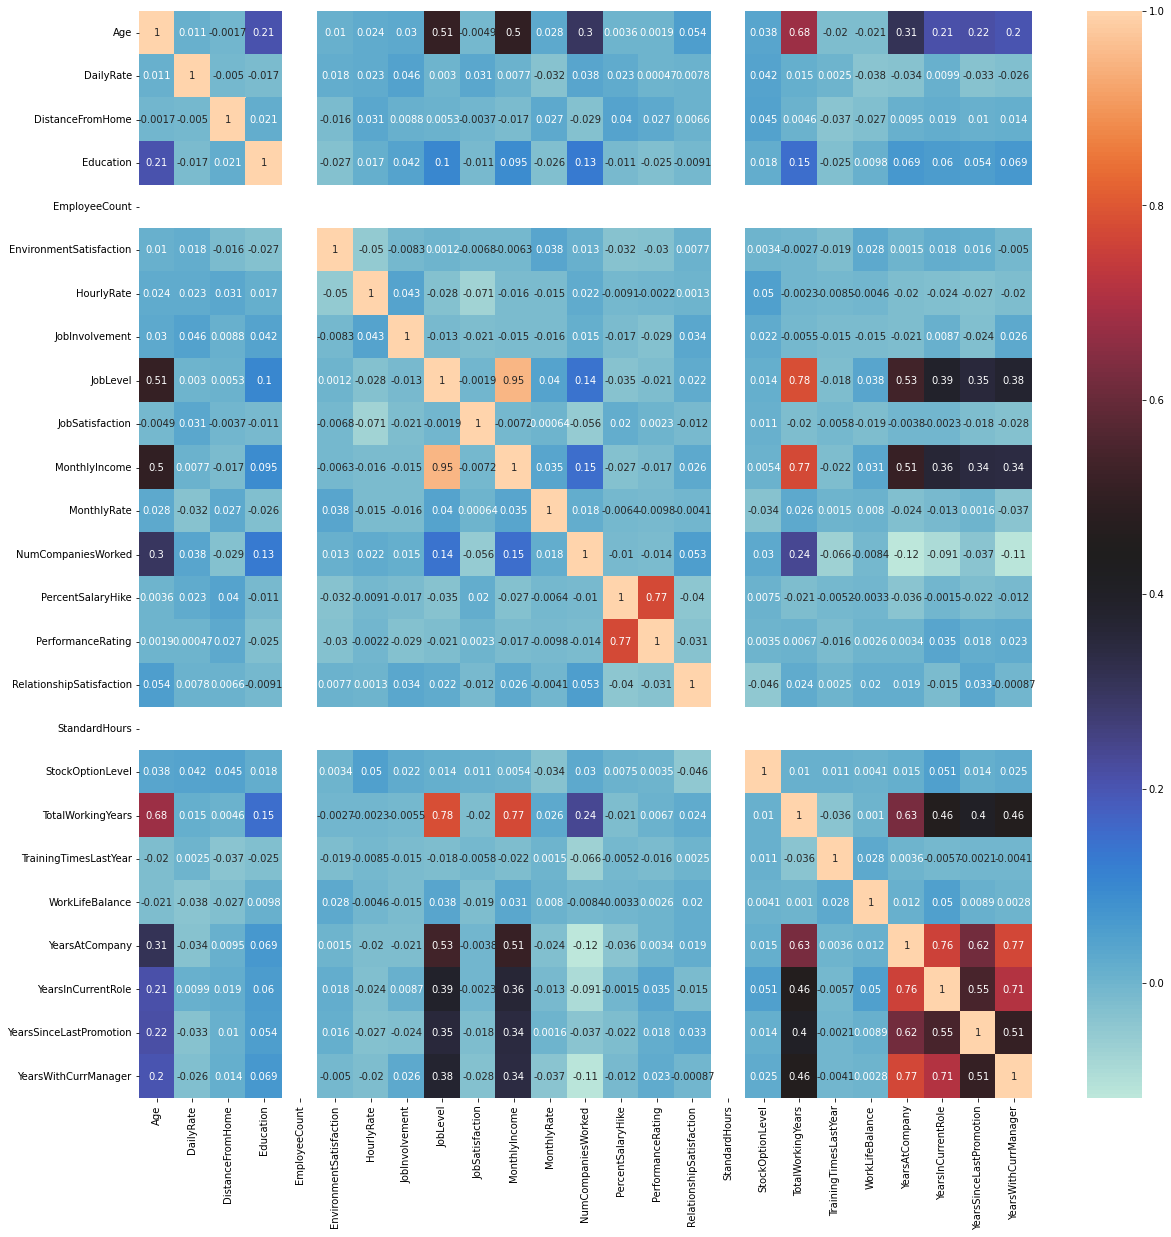

In [136]:
corr=main_df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr,annot=True, cmap='icefire')

The following observations can be made from the heatmap,
1. The 'MonthlyIncome' and 'JobLevel' have a strong positive correlation.
2. 'SalaryHike' and 'PerformanceRating' is also correlated, Higher the Performance Rating, Higher is the Hike
3. 'YearsAtCompany' and 'YeasWithCurrentManager' are also strongly correlated.
4. 'NumCompaniesWorked has a weak correlation with the 'TotalWorkingYears'
5. 'TotalWorkingYears' and 'YearsAtCompany' have strong correlation

As observed from the heatmap, 'EmployeeCount' and 'StandardHours' have no correlation with the other attributes in the dataset, hence we can drop these columns.

In [137]:
#Dropping the columns 'EmployeeCount' and 'StandardHours'
main_df=main_df.drop(columns=['EmployeeCount','StandardHours'])

Since only part of the data is encoded, the remaining categorical data should also be encoded before applying any Machine Learning Model

## Label Encoding

In [138]:
#Encoding the remaining catageorical fields before feeding it to the Machine Learning model
cat_column=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
for i in cat_column:
    main_df[i]=le.fit_transform(main_df[cat_column][i])

In [139]:
#Verfiying if the encoding was performed successfully
main_df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
5,32,0,1,1005,1,2,2,1,4,1,...,3,3,0,8,2,2,7,7,3,6
6,59,0,2,1324,1,3,3,3,3,0,...,4,1,3,12,3,2,1,0,0,0
7,30,0,2,1358,1,24,1,1,4,1,...,4,2,1,1,2,3,1,0,0,0
8,38,0,1,216,1,23,3,1,4,1,...,4,2,0,10,2,3,9,7,1,8
9,36,0,2,1299,1,27,3,3,3,1,...,3,2,2,17,3,2,7,7,7,7


##Feature Selection

In [140]:
x=main_df.drop('Attrition',axis=1)

In [141]:
x.shape

(1470, 30)

In [142]:
y=main_df['Attrition'].values

In [143]:
y.shape

(1470,)

In [144]:
from sklearn.feature_selection import chi2
chi_scores = chi2(x,y)
chi_scores

(array([8.41552768e+01, 2.20269350e-06, 9.56580494e+02, 1.32929732e+00,
        6.37721416e+01, 5.20642224e-01, 8.34911631e-01, 6.89059434e+00,
        5.10086544e-01, 4.31779090e-01, 4.60561607e+00, 2.49392423e+01,
        9.00444847e+00, 7.01194663e+00, 1.87456575e+01, 1.27922294e+05,
        1.19663355e+03, 6.43865444e+00, 6.38450667e+01, 2.35026858e-01,
        5.06064443e-04, 1.33233286e+00, 2.52688260e+01, 2.30721618e+02,
        3.08579616e+00, 1.08554296e+00, 1.42100054e+02, 1.17522596e+02,
        7.60172347e+00, 1.10671534e+02]),
 array([4.57401507e-020, 9.98815822e-001, 4.92392441e-210, 2.48930264e-001,
        1.39674848e-015, 4.70567856e-001, 3.60856114e-001, 8.66504535e-003,
        4.75101394e-001, 5.11117265e-001, 3.18674014e-002, 5.91657487e-007,
        2.69323253e-003, 8.09675971e-003, 1.49363092e-005, 0.00000000e+000,
        3.28793276e-262, 1.11663196e-002, 1.34598985e-015, 6.27821283e-001,
        9.82052402e-001, 2.48390623e-001, 4.98704142e-007, 4.14926182e-052

In [145]:
import pandas as pd
p_values = pd.Series(chi_scores[1],index = x.columns)
p_values.sort_values(ascending = False , inplace = True)

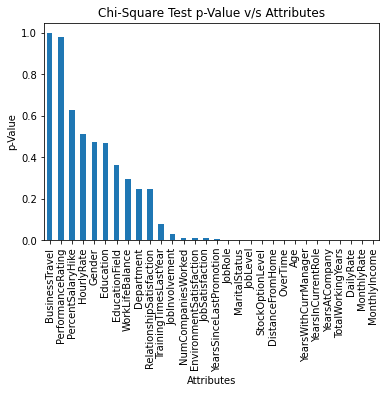

In [146]:
p_values.plot.bar()
plt.ylabel("p-Value")
plt.xlabel("Attributes")
plt.title("Chi-Square Test p-Value v/s Attributes")
plt.show()

Since the attributes, 
'BusinessTravel', 'PerformanceRating', 'PercentSalaryHike', 'HourlyRate', 'Gender', 'Education', 'EducationField', 'WorkLifeBalance', 'Department', 'RelationshipSatisfaction' 
have higher p-value they cannot be considered in training the model and hence will not be selected.

In [147]:
p_values

BusinessTravel               9.988158e-01
PerformanceRating            9.820524e-01
PercentSalaryHike            6.278213e-01
HourlyRate                   5.111173e-01
Gender                       4.751014e-01
Education                    4.705679e-01
EducationField               3.608561e-01
WorkLifeBalance              2.974609e-01
Department                   2.489303e-01
RelationshipSatisfaction     2.483906e-01
TrainingTimesLastYear        7.897860e-02
JobInvolvement               3.186740e-02
NumCompaniesWorked           1.116632e-02
EnvironmentSatisfaction      8.665045e-03
JobSatisfaction              8.096760e-03
YearsSinceLastPromotion      5.831253e-03
JobRole                      2.693233e-03
MaritalStatus                1.493631e-05
JobLevel                     5.916575e-07
StockOptionLevel             4.987041e-07
DistanceFromHome             1.396748e-15
OverTime                     1.345990e-15
Age                          4.574015e-20
YearsWithCurrManager         6.983

In [148]:
x=main_df.drop(['Attrition','BusinessTravel','PerformanceRating','PercentSalaryHike','HourlyRate','Gender','Education',
'EducationField','WorkLifeBalance','Department','RelationshipSatisfaction'],axis=1)

In [149]:
x.shape

(1470, 20)

Out of 35 attributes in the raw input data, only 20 features are selected to train the model which have the highest impact on attrition

## Training and Testing Data

In [150]:
#Splitting the Data into training and testing with test size as 20%, and constant random_state
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [151]:
x_train.shape

(1176, 20)

In [152]:
x_test.shape

(294, 20)

In [153]:
y_train.shape

(1176,)

In [154]:
y_test.shape

(294,)

## Scaling the Data

In [155]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

The data is scaled using the Standard Scaler to improve the accuracy of all the classifiers.

## Logistic Regression Classifier

In [156]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [157]:
logpred=log.predict(x_test)
logpred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0])

In [158]:
y_test

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0])

In [159]:
#Calculating the Accuracy
from sklearn.metrics import accuracy_score
logacc=accuracy_score(y_test,logpred)
logacc

0.8775510204081632

In [160]:
#Precision
from sklearn import metrics
metrics.precision_score(y_test, logpred)

0.782608695652174

In [161]:
#Recall
from sklearn.metrics import recall_score
recall_score(y_test, logpred)

0.3673469387755102

In [162]:
#F-1 Score
from sklearn.metrics import f1_score
f1_score(y_test, logpred)

0.5

In [163]:
#Generating the COnfusion Matrix
from sklearn.metrics import confusion_matrix
logcm=confusion_matrix(y_test,logpred)
logcm

array([[240,   5],
       [ 31,  18]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


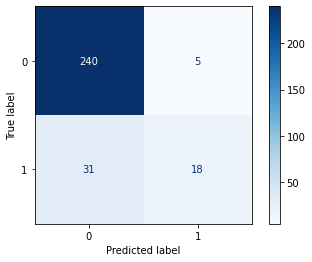

In [164]:
#Visualising the Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log, x_test, y_test, cmap='Blues')
plt.show()

## Decision Tree Classifier

In [165]:
#Apply the Decision Tree Classifier with entropy
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [166]:
dtcpred=dtc.predict(x_test)
dtcpred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0])

In [167]:
#Calculating the Accuracy
dtcacc=accuracy_score(y_test,dtcpred)
dtcacc

0.7925170068027211

In [168]:
#Precision
from sklearn import metrics
metrics.precision_score(y_test, dtcpred)

0.38461538461538464

In [169]:
#Recall
from sklearn.metrics import recall_score
recall_score(y_test, dtcpred)

0.40816326530612246

In [170]:
#F-1 Score
from sklearn.metrics import f1_score
f1_score(y_test, dtcpred)

0.39603960396039606

In [171]:
#Generating a Confusion Matrix
dtccm=confusion_matrix(y_test,dtcpred)
dtccm

array([[213,  32],
       [ 29,  20]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


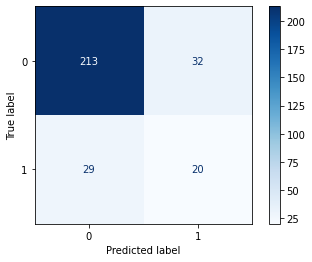

In [172]:
#Visualising the Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtc, x_test, y_test, cmap='Blues')
plt.show()

## Random Forest Classifier

In [173]:
#Applying Random Forest Classifier with entropy, and the estimators as 100, and log2 max_features
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion='entropy',n_estimators=100,max_features='log2')
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_features='log2')

In [174]:
rfc_pred=rfc.predict(x_test)
rfc_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [175]:
#Calculating the Accuracy
rfcacc=accuracy_score(y_test,rfc_pred)
rfcacc

0.8435374149659864

In [176]:
#Precision
from sklearn import metrics
metrics.precision_score(y_test, rfc_pred)

0.6153846153846154

In [177]:
#Recall
from sklearn.metrics import recall_score
recall_score(y_test, rfc_pred)

0.16326530612244897

In [178]:
#F-1 Score
from sklearn.metrics import f1_score
f1_score(y_test, rfc_pred)

0.25806451612903225

In [179]:
#Generating the Confusion Matrix
rfccm=confusion_matrix(y_test,rfc_pred)
rfccm

array([[240,   5],
       [ 41,   8]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


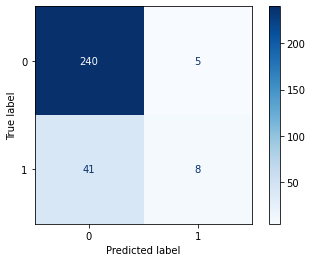

In [180]:
#Visualising the Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfc, x_test, y_test, cmap='Blues')
plt.show()

## Näive Bayes Classifier

In [181]:
from sklearn.naive_bayes import BernoulliNB
classifier=BernoulliNB()
classifier.fit(x_train,y_train)

BernoulliNB()

In [182]:
nb_y_pred=classifier.predict(x_test)
nb_y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0])

In [183]:
#Calculating the Accuracy
nbacc=accuracy_score(y_test,nb_y_pred)
nbacc

0.8027210884353742

In [184]:
#Precision
from sklearn import metrics
metrics.precision_score(y_test, nb_y_pred)

0.40816326530612246

In [185]:
#Recall
from sklearn.metrics import recall_score
recall_score(y_test, nb_y_pred)

0.40816326530612246

In [186]:
#F-1 Score
from sklearn.metrics import f1_score
f1_score(y_test, nb_y_pred)

0.40816326530612246

In [187]:
#Generating the Confusion Matrix
nbcm=confusion_matrix(y_test,nb_y_pred)
nbcm

array([[216,  29],
       [ 29,  20]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


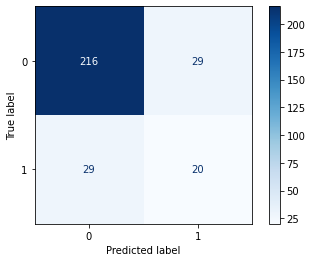

In [188]:
#Visualising the Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, x_test, y_test, cmap='Blues')
plt.show()

## K-Nearest Neighbour Classifier

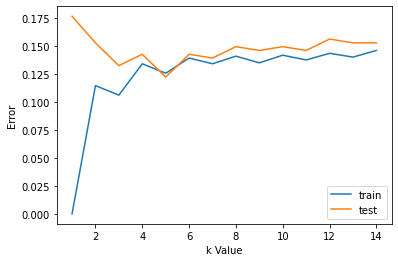

In [189]:
#Computing the ideal value for k, to apply the KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
error1= []
error2= []
for k in range(1,15):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred1= knn.predict(x_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(x_test)
    error2.append(np.mean(y_test!= y_pred2))
plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

As observed, for k=5 the error for the testing data is the minimum, hence k is considered as 5 for the dataset.

In [190]:
#Applying the KNN Classifier with neighbours as '5'
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [191]:
knn_y_pred=knn.predict(x_test)
knn_y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0])

In [192]:
#Accuracy of KNN
knn_acc=accuracy_score(y_test,knn_y_pred)
knn_acc

0.8775510204081632

In [193]:
#Precision
from sklearn import metrics
metrics.precision_score(y_test, knn_y_pred)

0.8421052631578947

In [194]:
#Recall
from sklearn.metrics import recall_score
recall_score(y_test, knn_y_pred)

0.32653061224489793

In [195]:
#F-1 Score
from sklearn.metrics import f1_score
f1_score(y_test, knn_y_pred)

0.4705882352941176

In [196]:
#Generating the Confusion Matrix
knn_cm=confusion_matrix(y_test,knn_y_pred)
knn_cm

array([[242,   3],
       [ 33,  16]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


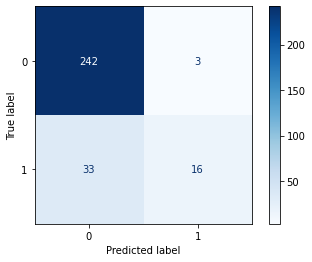

In [197]:
#Visualising the Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, x_test, y_test, cmap='Blues')
plt.show()

## Support Vector Machines

In [198]:
from sklearn import svm
svm_clf=svm.SVC(kernel ='sigmoid', probability=True, random_state=0)
svm_clf.fit(x_train, y_train)

SVC(kernel='sigmoid', probability=True, random_state=0)

In [199]:
svm_y_pred=svm_clf.predict(x_test)
svm_y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [200]:
#Accuracy of SVM
svm_acc=accuracy_score(y_test,svm_y_pred)
svm_acc

0.8435374149659864

In [201]:
#Precision
from sklearn import metrics
metrics.precision_score(y_test, svm_y_pred)

0.5517241379310345

In [202]:
#Recall
from sklearn.metrics import recall_score
recall_score(y_test, svm_y_pred)

0.32653061224489793

In [203]:
#F-1 Score
from sklearn.metrics import f1_score
f1_score(y_test, svm_y_pred)

0.41025641025641024

In [204]:
#Generating the Confusion Matrix
svm_cm=confusion_matrix(y_test,svm_y_pred)
svm_cm

array([[232,  13],
       [ 33,  16]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


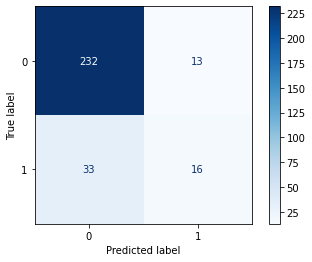

In [205]:
#Visualising the Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm_clf, x_test, y_test, cmap='Blues')
plt.show()

## Multilayer Perceptron

In [206]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(7,18),
                    random_state=5,
                    verbose=True,
                    learning_rate='adaptive',
                    learning_rate_init=0.01,
                    activation='identity')
clf.fit(x_train,y_train)

Iteration 1, loss = 0.62649895
Iteration 2, loss = 0.42789490
Iteration 3, loss = 0.37982105
Iteration 4, loss = 0.35793265
Iteration 5, loss = 0.35076492
Iteration 6, loss = 0.34541676
Iteration 7, loss = 0.34227425
Iteration 8, loss = 0.33920541
Iteration 9, loss = 0.33744206
Iteration 10, loss = 0.33668931
Iteration 11, loss = 0.33680891
Iteration 12, loss = 0.33578926
Iteration 13, loss = 0.33726570
Iteration 14, loss = 0.33498407
Iteration 15, loss = 0.33649475
Iteration 16, loss = 0.33611739
Iteration 17, loss = 0.33532511
Iteration 18, loss = 0.33484298
Iteration 19, loss = 0.33508655
Iteration 20, loss = 0.33519051
Iteration 21, loss = 0.33635915
Iteration 22, loss = 0.33407695
Iteration 23, loss = 0.33604271
Iteration 24, loss = 0.33374937
Iteration 25, loss = 0.33546021
Iteration 26, loss = 0.33482550
Iteration 27, loss = 0.33460495
Iteration 28, loss = 0.33337166
Iteration 29, loss = 0.33429017
Iteration 30, loss = 0.33381544
Iteration 31, loss = 0.33442248
Iteration 32, los

MLPClassifier(activation='identity', hidden_layer_sizes=(7, 18),
              learning_rate='adaptive', learning_rate_init=0.01, random_state=5,
              verbose=True)

In [207]:
# Make prediction on test dataset
mlp_ypred=clf.predict(x_test)

# Import accuracy score 
from sklearn.metrics import accuracy_score

# Calcuate accuracy of MLP
accuracy_score(y_test,mlp_ypred)

0.8809523809523809

In [208]:
#Precision
from sklearn import metrics
precision= metrics.precision_score(y_test, mlp_ypred)
precision

0.7692307692307693

In [209]:
#Recall
from sklearn.metrics import recall_score
recall_score(y_test, mlp_ypred)

0.40816326530612246

In [210]:
#F-1 Score
from sklearn.metrics import f1_score
f1_score(y_test, mlp_ypred)

0.5333333333333333

In [211]:
#Generating the Confusion Matrix
mlp_cm=confusion_matrix(y_test,mlp_ypred)
mlp_cm

array([[239,   6],
       [ 29,  20]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


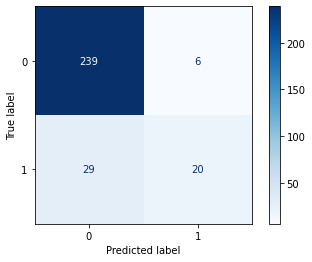

In [212]:
#Visualising the Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, x_test, y_test, cmap='Blues')
plt.show()

## ROC Curve and AUC



In [213]:
#Generating the predicted probabilities of all the classifiers
from sklearn.metrics import roc_curve, roc_auc_score
#Logistic Regression
y_score1 = log.predict_proba(x_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
#Decision Tree
y_score2 = dtc.predict_proba(x_test)[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
#Random Forest Classifier
y_score3 = rfc.predict_proba(x_test)[:,1]
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)
#Naïve Bayes Classifier
y_score4 = classifier.predict_proba(x_test)[:,1]
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, y_score4)
#KNN Classifier
y_score5 = knn.predict_proba(x_test)[:,1]
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(y_test, y_score5)
#SVM
y_score6 = svm_clf.predict_proba(x_test)[:,1]
false_positive_rate6, true_positive_rate6, threshold6 = roc_curve(y_test, y_score6)
#MLP
# y_score7 = clf.predict_proba(x_test)[:,1]
# false_positive_rate7, true_positive_rate7, threshold7 = roc_curve(y_test, y_score6)

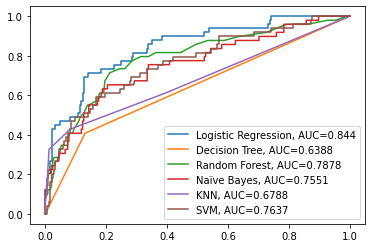

In [214]:
from sklearn import metrics
plt.figure(0).clf()
auc = round(metrics.roc_auc_score(y_test, y_score1), 4)
plt.plot(false_positive_rate1, true_positive_rate1,label="Logistic Regression, AUC="+str(auc))

auc = round(metrics.roc_auc_score(y_test, y_score2), 4)
plt.plot(false_positive_rate2, true_positive_rate2,label="Decision Tree, AUC="+str(auc))

auc = round(metrics.roc_auc_score(y_test, y_score3), 4)
plt.plot(false_positive_rate3, true_positive_rate3,label="Random Forest, AUC="+str(auc))

auc = round(metrics.roc_auc_score(y_test, y_score4), 4)
plt.plot(false_positive_rate4, true_positive_rate4,label="Naïve Bayes, AUC="+str(auc))

auc = round(metrics.roc_auc_score(y_test, y_score5), 4)
plt.plot(false_positive_rate5, true_positive_rate5,label="KNN, AUC="+str(auc))

auc = round(metrics.roc_auc_score(y_test, y_score6), 4)
plt.plot(false_positive_rate6, true_positive_rate6,label="SVM, AUC="+str(auc))

# auc = round(metrics.roc_auc_score(y_test, y_score7), 4)
# plt.plot(false_positive_rate7, true_positive_rate7,label="MLP, AUC="+str(auc))

plt.legend()

Tabular Perfomance Comparison based on the metrics considered


| Classifier | Accuracy | Precision | Recall | F-1 Score | AUC |
| --- | --- | --- | --- | --- | --- |
| Logistic Regression | 87.76% | 78.26% | 36.73% | 50.00% | 84.40% |
| Decision Tree | 79.25% | 30.76% | 32.65% | 31.68% | 58.98% |
| Random Forest | 84.69% | 61.53% | 16.32% | 25.80% | 78.41% |
| Naïve Bayes | 80.27% | 40.82% | 40.82% | 40.82% | 76.38% |
| K-Nearest Neighbour | 87.75% | 84.21% | 32.65% | 47.05% | 67.88% |
| Support Vector Machine | 84.35% | 55.17% | 32.65% | 41.02% | 76.37% |
| Multilayer Perceptron | 88.09% | 76.92% | 40.81% | 53.33% | 84.85% |






*   After exploration and preprocessing of the data, the most important and impactful features were extracted from the data using Chi-square Test and the attributes were reduced to 20 from 35 initially. The data was then divided, trained and tested and the accuracy, precision, recall and F-1 score was generated of each model and an ROC curve was plotted with the AUC.
*   Logistic Regression recorded the highest accuracy of 87.75% even though it is prone to overfitting, the results recorded are realistic with a precision of 78.26%.
*   The algorithms that performed the lowest were Decision Tree classifier, they not only had the lowest accuracy but also showed very poor precision in terms of prediction as well as underperformed in the other metrics considered.
*   As observed in the ROC Curve as well, Logistic Regression shows the best reults, with the highest AUC score of 0.844, follwed by Random Forest with the AUC score of 0.7841.
*  KNN model train with k=5 (no. of neighbours) can be considered as an equally efficient model just like Logistic Regression, since it has similar accuracy to Logistic Regression and better precision of 84.21%, Recall and F-1 scores are also comparable, however, the AUC score of KNN is one of the lowest after Decision Tree classifier among all the algorithms considered.
*   Similarly, Decision Tree classifier has recorded the lowest performance in all the metrics considered in this study and is therefore, also rejected.
*   Based on the metrics considered, SVM with the sigmoid kernel also shows promising results when tested on this set of data. 
*   However, Logistic Regression is considered as the ideal classifier for the data under study as it performs equally well on the validation metrics in terms of accuracy, precision, recall, f1 score and AUC and can accurately predict the employee attrition in an organisation.
 






  

In [215]:
x_train.shape

(1176, 20)

In [216]:
from sklearn.linear_model import LogisticRegression
log_op=LogisticRegression()
log_op.fit(x_train,y_train)

LogisticRegression()

In [217]:
log_op

LogisticRegression()

In [218]:
y_predict_prob = log_op.predict_proba(x_test)

In [219]:
y_predict_prob_class_1 = y_predict_prob[:,1]

In [220]:
y_predict_class = [1 if prob > 0.4 else 0 for prob in y_predict_prob_class_1]

In [221]:
print("Accuracy:", round(accuracy_score(y_test, y_predict_class), 4))

Accuracy: 0.8673


In [222]:
#Precision
from sklearn import metrics
metrics.precision_score(y_test, y_predict_class)

0.6388888888888888

In [223]:
#Recall
from sklearn.metrics import recall_score
recall_score(y_test, y_predict_class)

0.46938775510204084

In [224]:
#F-1 Score
from sklearn.metrics import f1_score
f1_score(y_test, y_predict_class)

0.5411764705882353

In [225]:
#Generating the Confusion Matrix
lr_cm=confusion_matrix(y_test,y_predict_class)
lr_cm

array([[232,  13],
       [ 26,  23]])

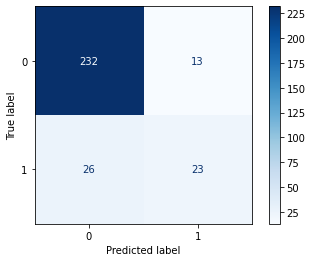

In [226]:
#Visualising the Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_predict_class,cmap='Blues')
plt.show()